In [12]:
from datasets import load_dataset, Dataset,IterableDataset
from huggingface_hub import interpreter_login
import xarray as xr
import matplotlib.pyplot as plt

# Loading with Hugging Face

We have a private dataset, so currently you must login to access the data

In [2]:
interpreter_login(new_session=False)

User is already logged in.


### Streaming Data with Hugging Face

Here we grab a copy of the dataset directly from Hugging Face. Downloading all of the data is slow, so here we stream examples.

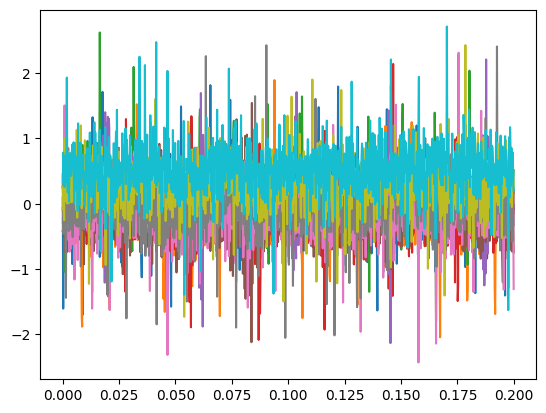

In [24]:
dataset = load_dataset('sljack/mast', 
                       'AMC_PLASMA_CURRENT', 
                       split='full',
                       use_auth_token=True,
                       streaming=True,
                       )

def slice_pulse(item):
    time = item['time']
    msk = (time > 0) & (time < .2)
    item['data'] = item['data'][msk]
    item['time'] = item['time'][msk]
    return item

dataset = dataset.with_format('numpy')
dataset = dataset.map(slice_pulse)

for item in dataset.take(10):
    plt.plot(item['time'], item['data'])